# 숫자 이미지를 만들기위한 작업
## shift(5방향)

In [29]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data_path = './data/font'
data_folder = os.listdir(data_path)
data_folder_list = []
for data in data_folder:
    data_folder_list.append(f'{data_path}/{data}')
    print(os.listdir(font_path))

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', 'char', 'd.jpg']
['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', 'char', 'd.jpg']
['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', 'char', 'd.jpg']


In [26]:
gothic_list = []
for img_name in os.listdir(data_folder_list[0]):
    gothic_list.append(f'{data_folder_list[0]}/{img_name}')

In [135]:
gray_img = cv2.imread(gothic_list[0], cv2.IMREAD_GRAYSCALE)

### shift 해줄때 배경부분이 까맣게되는걸 막기위한 사전처리

In [62]:
for y in range(gray_img.shape[0]):
    for x in range(gray_img.shape[1]):
        # 검은색은 0인데 이걸 일단 1로 바꿔둠
        if gray_img[y][x] == 0:
            gray_img[y][x] = 1

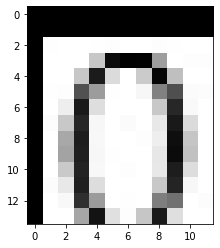

In [63]:
# 변환 행렬, X축으로 10 Y축으로 20 이동
M = np.float32([[1,0,1],[0,1,2]])
shift_img = cv2.warpAffine(gray_img, M,(gray_img.shape[1], gray_img.shape[0]))
plt.imshow(shift_img, 'gray')

### 0을 255로 바꿔줌

In [64]:
for y in range(shift_img.shape[0]):
    for x in range(shift_img.shape[1]):
        if shift_img[y][x] == 0:
            shift_img[y][x] = 255
        if shift_img[y][x] == 1:
            shift_img[y][x] = 0

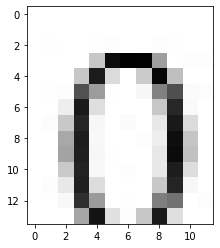

In [65]:
plt.imshow(shfit_img, 'gray')

### 함수화

In [165]:
def shift_img(img, x_shift, y_shift):
    gray_img = img
    for y in range(gray_img.shape[0]):
        for x in range(gray_img.shape[1]):
            # 검은색은 0인데 이걸 일단 1로 바꿔둠
            if gray_img[y][x] == 0:
                gray_img[y][x] = 1
    # 변환 행렬, x축으로 x_sshift
    M = np.float32([[1,0,x_shift],[0,1,y_shift]])
    shift_img = cv2.warpAffine(gray_img, M,(gray_img.shape[1], gray_img.shape[0]))
    for y in range(shift_img.shape[0]):
        for x in range(shift_img.shape[1]):
            if shift_img[y][x] == 0:
                shift_img[y][x] = 255
            if shift_img[y][x] == 1:
                shift_img[y][x] = 0
    return shift_img

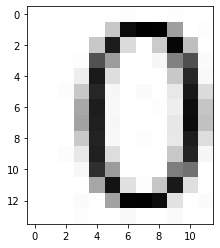

In [167]:
gray_img = cv2.imread(gothic_list[0], cv2.IMREAD_GRAYSCALE)
plt.imshow(shift_img(gray_img, 2, 0), 'gray')

## blur(3가지)

In [153]:
def blur_img(img_path, scale):
    gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    return cv2.blur(gray_img, (scale,scale))

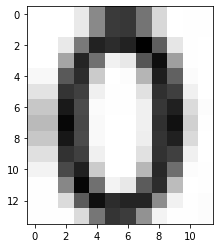

In [154]:
plt.imshow(blur_img(gothic_list[0], 2), 'gray')

## 노이즈(3가지)
- 그냥 적당히 특정 값을 곱해줌

In [148]:
def noise_img(img_path, scale):
    gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    return gray_img * scale

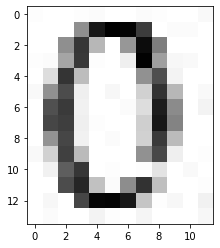

In [152]:
plt.imshow(noise_img(gothic_list[0], 2), 'gray')

## 폰트(고딕, 굴림, 궁서)

## 숫자 합치기
- np.concat

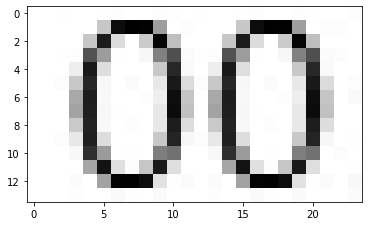

In [168]:
plt.imshow(np.concatenate((shift_img(gray_img, 2, 0), gray_img), axis = 1), 'gray')

### 두 자리 - 세 자리 숫자를 만들도록 함(뒤에 0.5를 붙이는건 옵션)

In [185]:
data_path = './data/font'
data_folder = os.listdir(data_path)
data_folder_list = []
for data in data_folder:
    data_folder_list.append(f'{data_path}/{data}')
    print(os.listdir(font_path))
    
fonts_list = []
save_list = []
for font_ in data_folder_list:
    font_list = []
    for img_name in os.listdir(font_):
        if '.jpg' in img_name:
            font_list.append(f'{data_folder_list[0]}/{img_name}')
        else:
            save_list.append(f'{data_folder_list[0]}/{img_name}')
    fonts_list.append(font_list)

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', 'char', 'd.jpg']
['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', 'char', 'd.jpg']
['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', 'char', 'd.jpg']


### 0-gothic 1-gulim  2-gungsuh

In [186]:
save_list[0]

'./data/font/gothic/char'

In [184]:
fonts_list[0]

['./data/font/gothic/0.jpg',
 './data/font/gothic/1.jpg',
 './data/font/gothic/2.jpg',
 './data/font/gothic/3.jpg',
 './data/font/gothic/4.jpg',
 './data/font/gothic/5.jpg',
 './data/font/gothic/6.jpg',
 './data/font/gothic/7.jpg',
 './data/font/gothic/8.jpg',
 './data/font/gothic/9.jpg',
 './data/font/gothic/d.jpg']

In [191]:
first_num = fonts_list[0][1:-1]

In [262]:
second_num = fonts_list[0][0:-1]

In [251]:
# 0.5 이미지를 만들어 둠
dot_img1 = cv2.imread(fonts_list[0][-1], cv2.IMREAD_GRAYSCALE)
dot_img2 = cv2.imread(fonts_list[0][5], cv2.IMREAD_GRAYSCALE)

dot_img = np.concatenate((dot_img1, shift_img(dot_img2, -4, 0)), axis = 1)

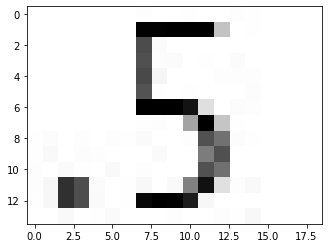

In [252]:
plt.imshow(dot_img, 'gray')

In [263]:
class num:
    def __init__(self,img, label):
        self.img = img
        self.label = label

In [275]:
one_img = cv2.imread(first_num[0], cv2.IMREAD_GRAYSCALE)

In [ ]:
%%time
double_list = []
for first in first_num:
    first_img = cv2.imread(first, cv2.IMREAD_GRAYSCALE)
    for second in second_num:
        second_img = cv2.imread(second, cv2.IMREAD_GRAYSCALE)
        label = first[-5] + second[-5]
        img = np.concatenate((shift_img(first_img, 2, 0), second_img), axis = 1)
        for i in range(2):
            if i % 2 == 0:
                pass
            else:
                img = np.concatenate((img, shift_img(dot_img, -2, 0)), axis = 1)
                label += 'd5'
            double_list.append(num(img, label))        

In [264]:
%%time
double_list = []
for first in first_num:
    first_img = cv2.imread(first, cv2.IMREAD_GRAYSCALE)
    for second in second_num:
        second_img = cv2.imread(second, cv2.IMREAD_GRAYSCALE)
        label = first[-5] + second[-5]
        img = np.concatenate((shift_img(first_img, 2, 0), second_img), axis = 1)
        for i in range(2):
            if i % 2 == 0:
                pass
            else:
                img = np.concatenate((img, shift_img(dot_img, -2, 0)), axis = 1)
                label += 'd5'
            double_list.append(num(img, label))        

Wall time: 340 ms


C:\ProgramData\Anaconda3\envs\tmh_env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


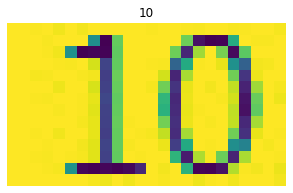

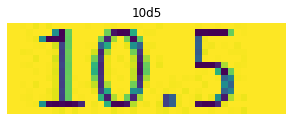

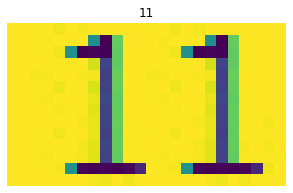

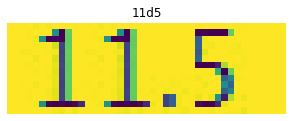

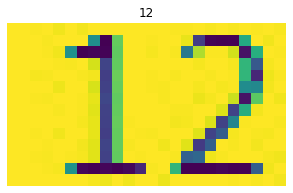

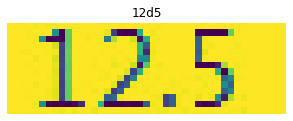

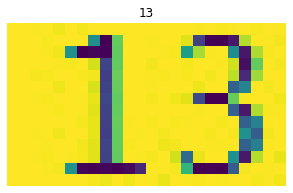

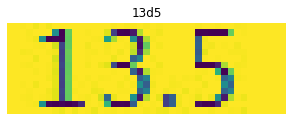

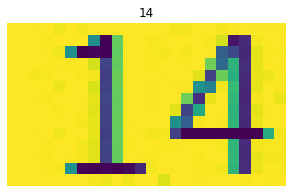

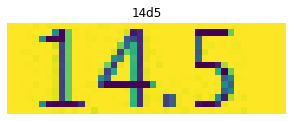

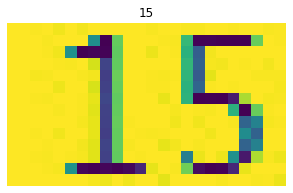

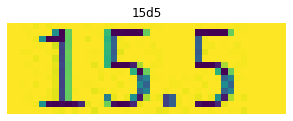

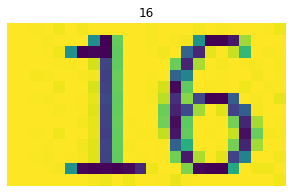

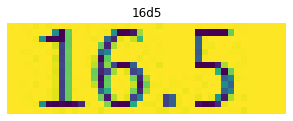

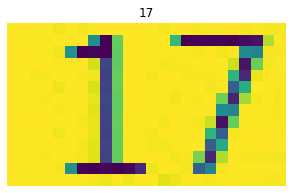

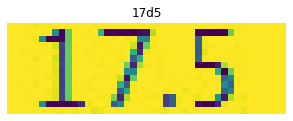

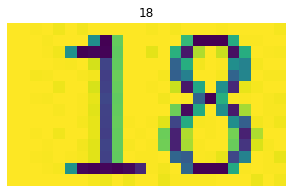

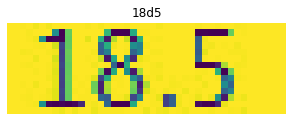

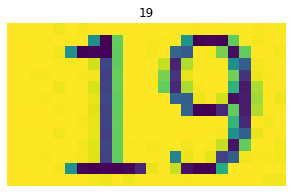

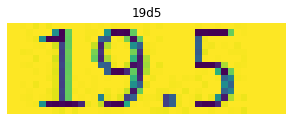

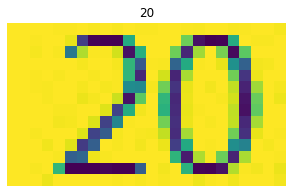

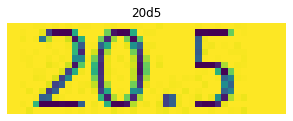

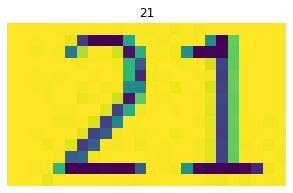

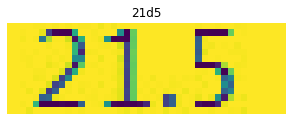

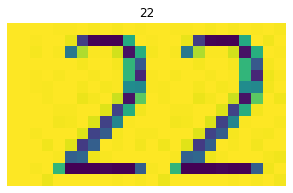

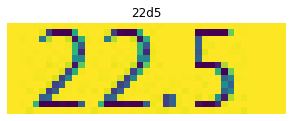

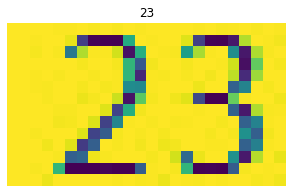

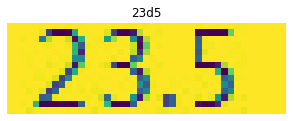

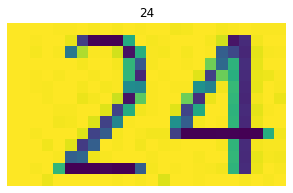

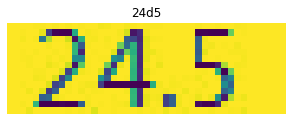

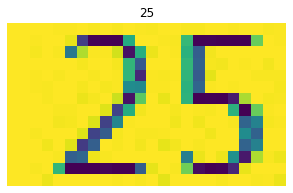

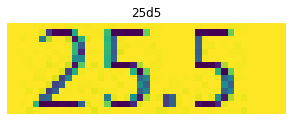

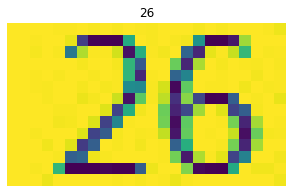

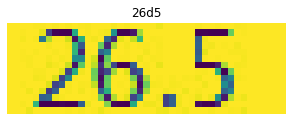

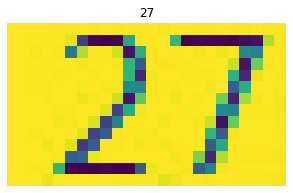

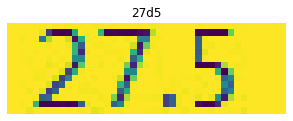

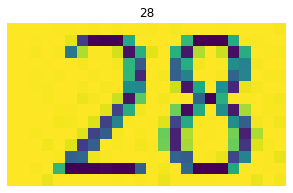

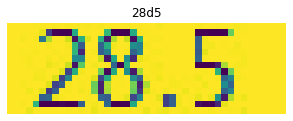

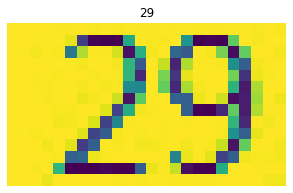

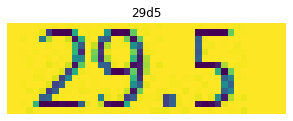

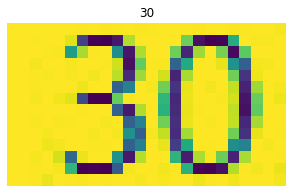

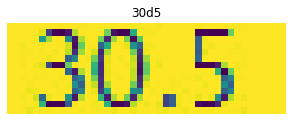

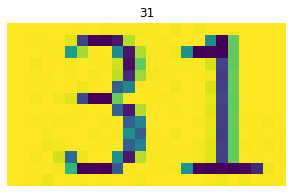

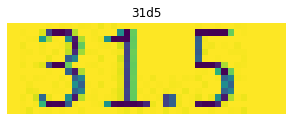

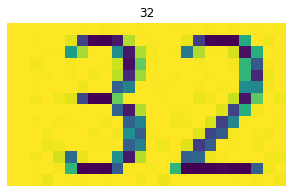

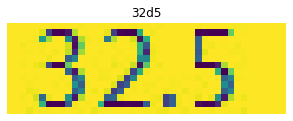

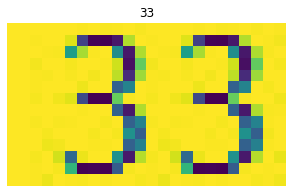

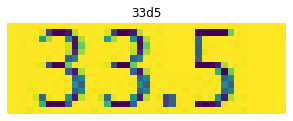

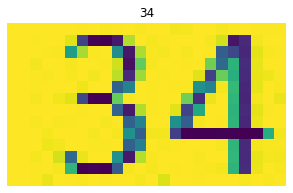

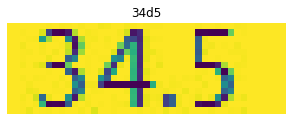

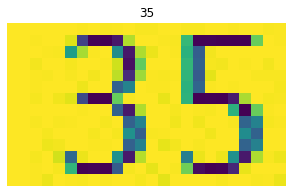

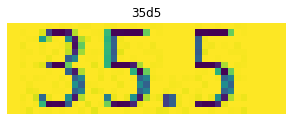

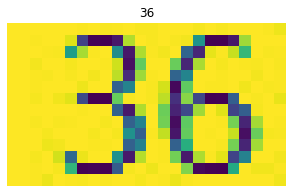

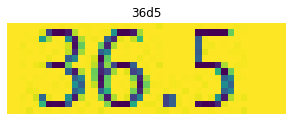

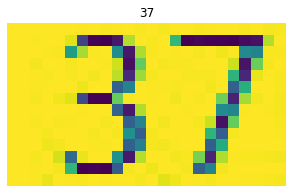

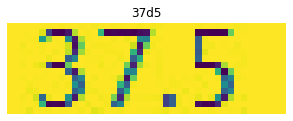

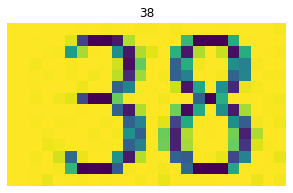

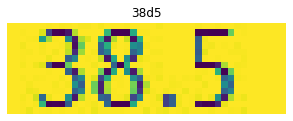

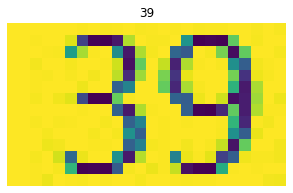

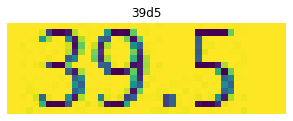

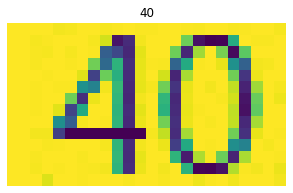

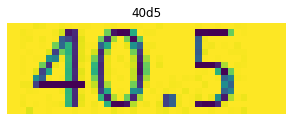

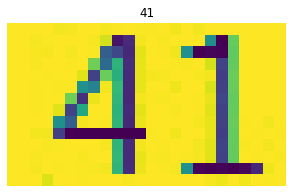

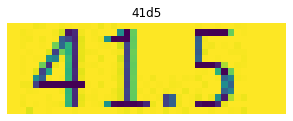

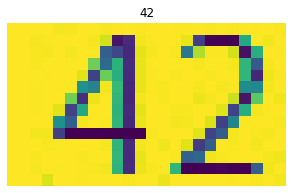

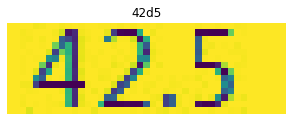

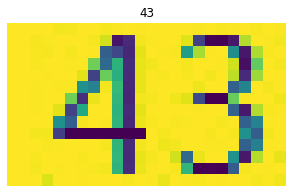

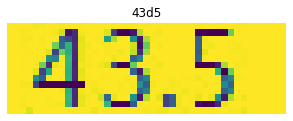

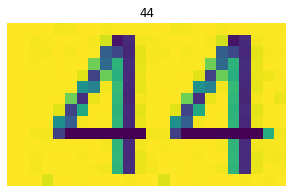

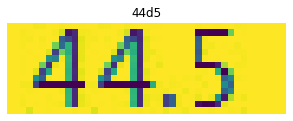

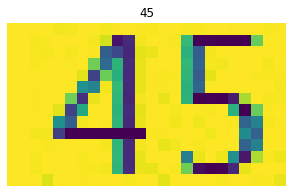

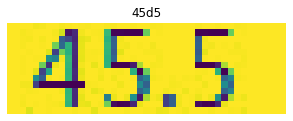

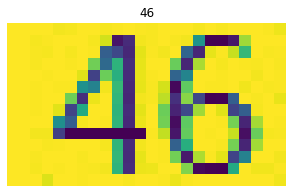

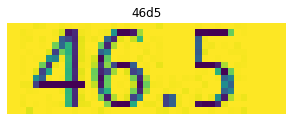

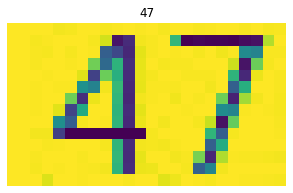

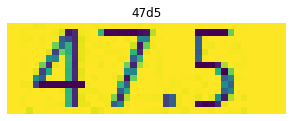

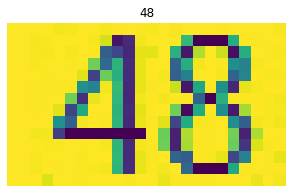

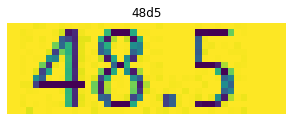

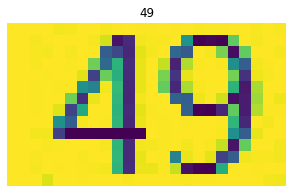

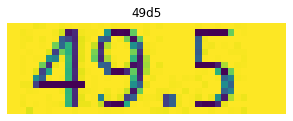

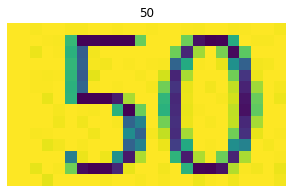

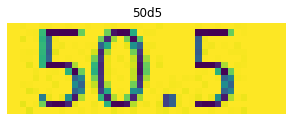

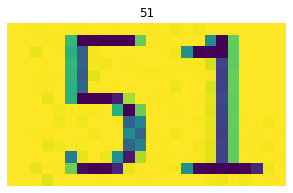

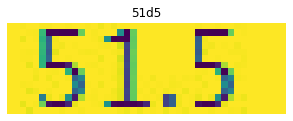

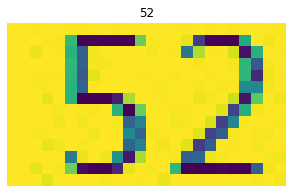

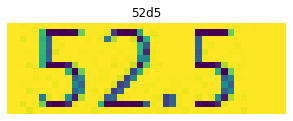

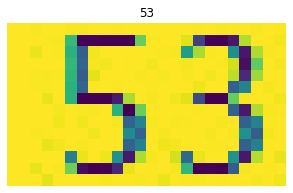

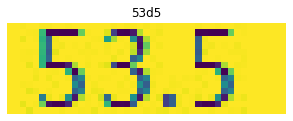

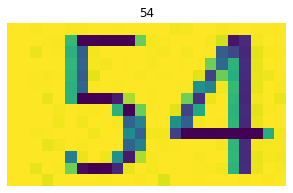

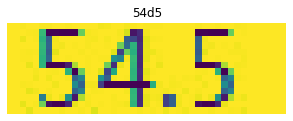

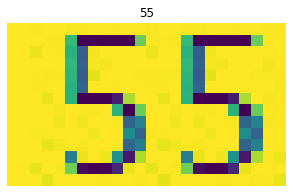

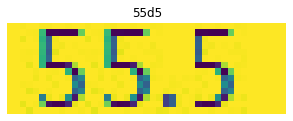

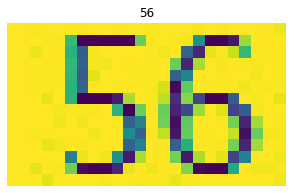

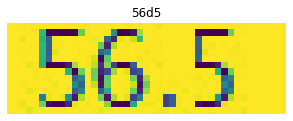

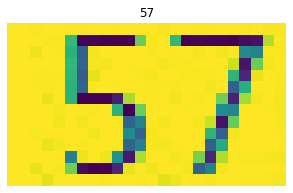

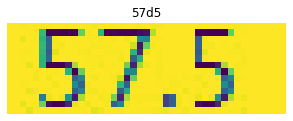

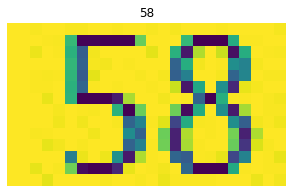

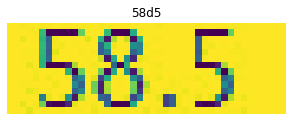

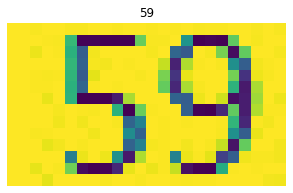

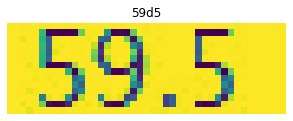

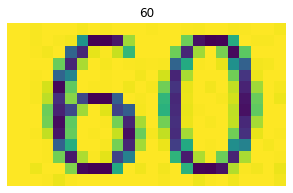

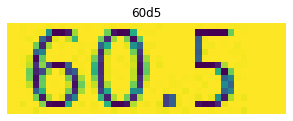

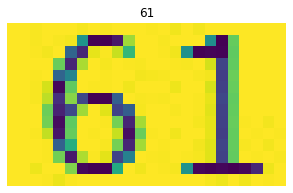

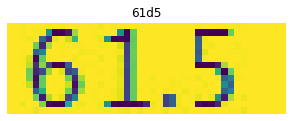

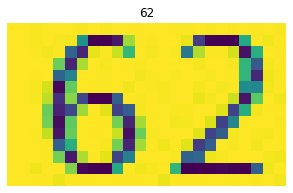

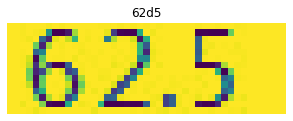

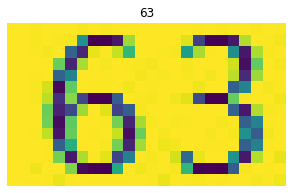

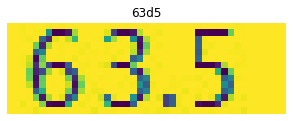

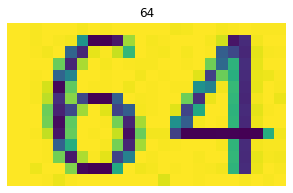

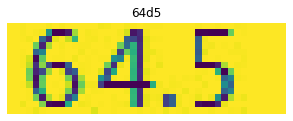

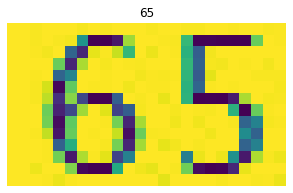

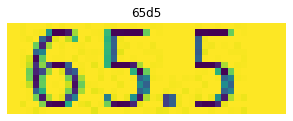

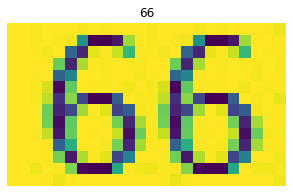

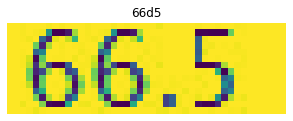

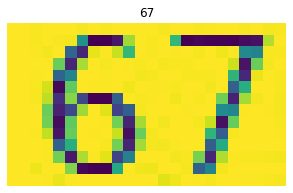

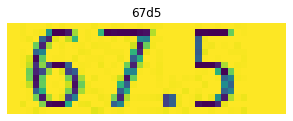

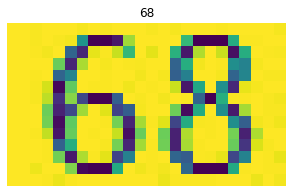

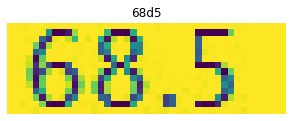

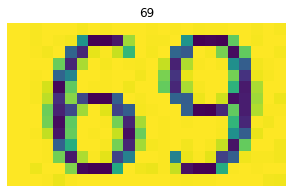

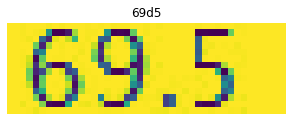

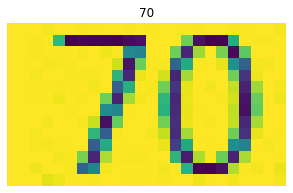

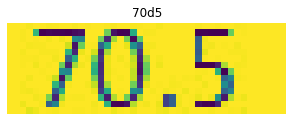

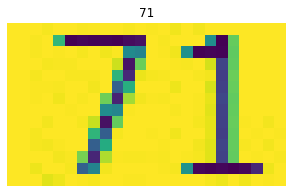

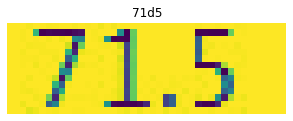

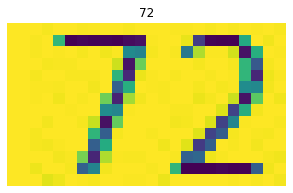

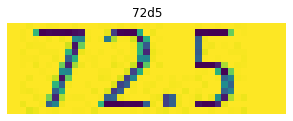

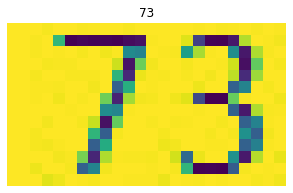

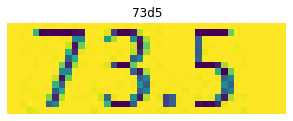

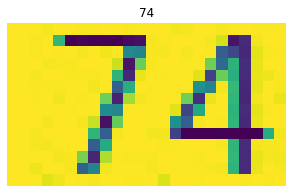

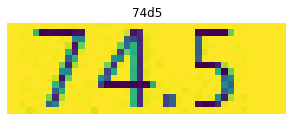

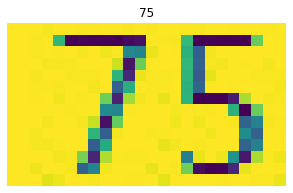

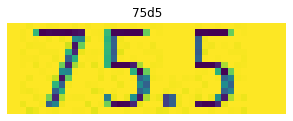

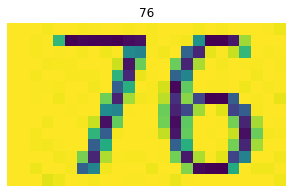

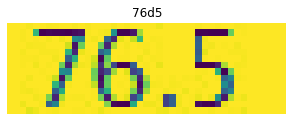

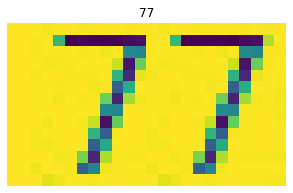

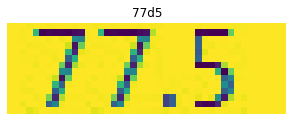

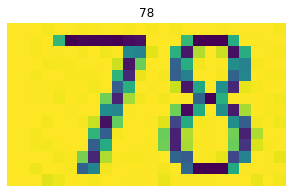

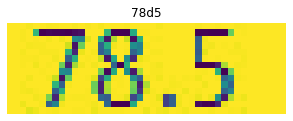

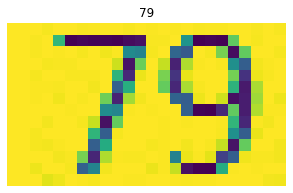

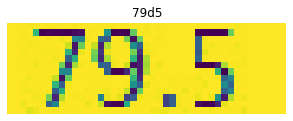

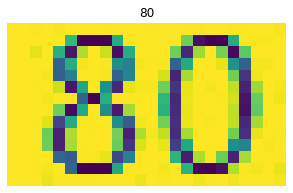

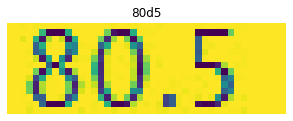

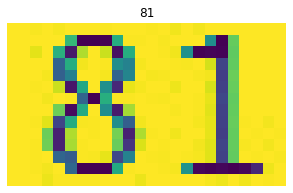

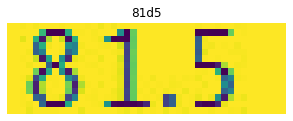

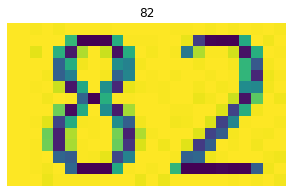

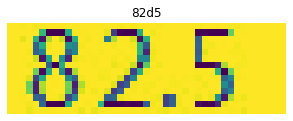

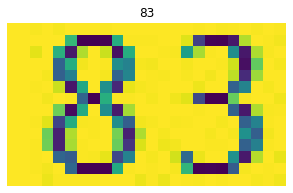

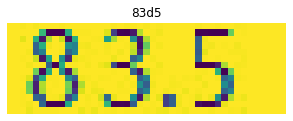

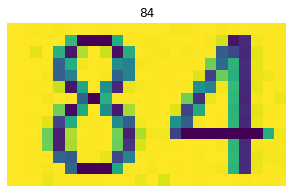

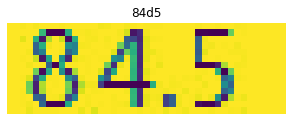

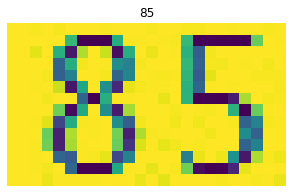

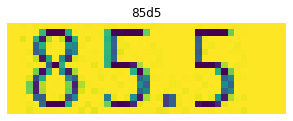

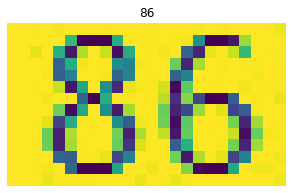

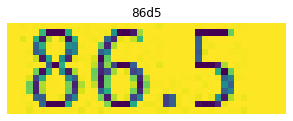

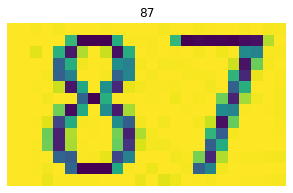

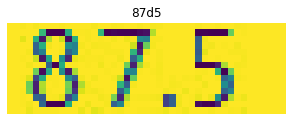

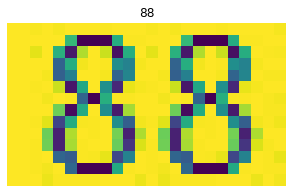

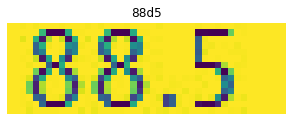

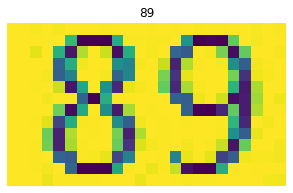

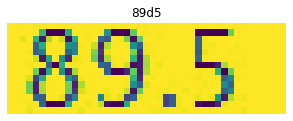

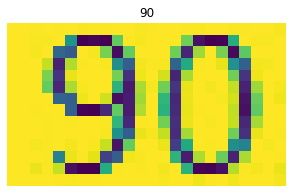

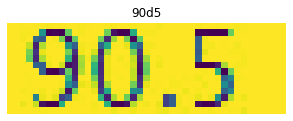

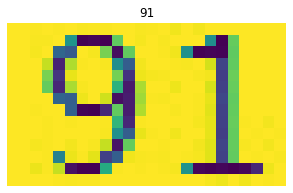

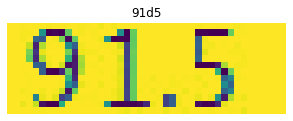

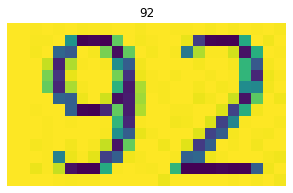

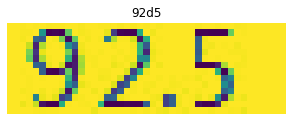

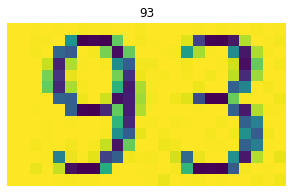

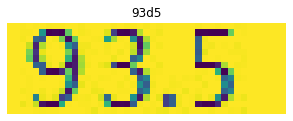

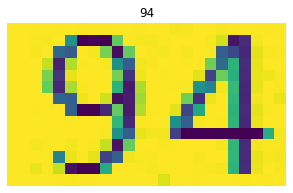

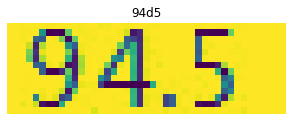

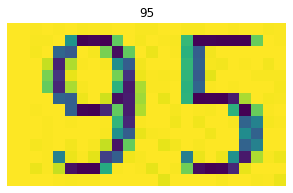

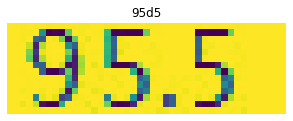

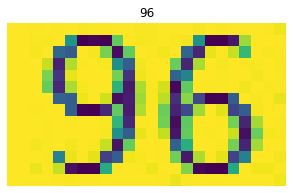

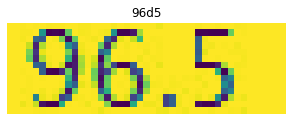

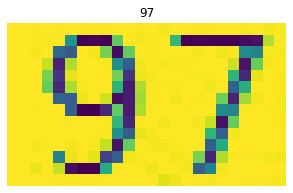

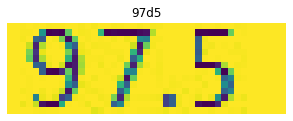

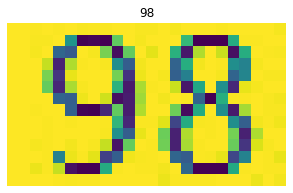

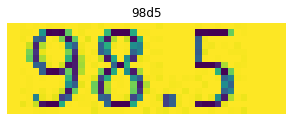

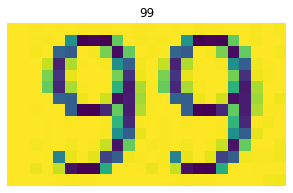

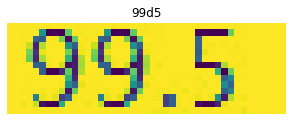

In [265]:
for num in double_list:
    fig, axes = plt.subplots(1, 1, figsize=(5,5))
    plt.title(f'{num.label}')
    axes.imshow(num.img)
    axes.axis('off')

### 구조화

In [267]:
class num:
    def __init__(self,img, label):
        self.img = img
        self.label = label

In [268]:
%%time
font_doube_list = []
for font in fonts_list:
    first_num = font[1:-1]
    second_num = font[0:-1]
    # 0.5 이미지를 만들어 둠
    dot_img1 = cv2.imread(font[-1], cv2.IMREAD_GRAYSCALE)
    dot_img2 = cv2.imread(font[5], cv2.IMREAD_GRAYSCALE)
    dot_img = np.concatenate((dot_img1, shift_img(dot_img2, -4, 0)), axis = 1)
    
    double_list = []
    for first in first_num:
        first_img = cv2.imread(first, cv2.IMREAD_GRAYSCALE)
        for second in second_num:
            second_img = cv2.imread(second, cv2.IMREAD_GRAYSCALE)
            label = first[-5] + second[-5]
            img = np.concatenate((shift_img(first_img, 2, 0), second_img), axis = 1)
            for i in range(2):
                if i % 2 == 0:
                    pass
                else:
                    img = np.concatenate((img, shift_img(dot_img, -2, 0)), axis = 1)
                    label += 'd5'
                double_list.append(num(img, label))   
    font_doube_list.append(double_list)

Wall time: 974 ms


180